<a href="https://colab.research.google.com/github/aliciawill/Kaggle/blob/master/proDS_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 폰트 관련 용도
%config InlineBackend.figure_format = 'retina'

 

#!apt -qq -y install fonts-nanum

# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

In [143]:
# 주요 라이브러리 import

import warnings
warnings.filterwarnings(action='ignore')

import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


########추가
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
########## DS_sample_1.csv
### https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download download

In [5]:
## 0. 전처리
ds_df_1 = pd.read_csv('/content/drive/MyDrive/0-MULTI/pro_ds/DS_Sample_1.csv')
ds_df_1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
ds_df_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
ds_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
## CREDIT_LIMIT                      8949
## MINIMUM_PAYMENTS                  8637
## --> 결측치 존재
ds_df_1.isnull().sum() 
## CREDIT_LIMIT                      1
## MINIMUM_PAYMENTS                  313

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
## nan이 많은 순으로 정렬
ds_df_1.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [10]:
ds_df_1['MINIMUM_PAYMENTS'].fillna((ds_df_1['MINIMUM_PAYMENTS'].mean()), inplace = True)

In [11]:
## MINIMUM_PAYMENTS의 결측치가 사라짐. 
ds_df_1.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [12]:
ds_df_1['CREDIT_LIMIT'].fillna((ds_df_1['CREDIT_LIMIT'].mean()), inplace = True)

In [13]:
## CREDIT_LIMIT의 결측치가 사라짐. 
ds_df_1.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [14]:
card1 = ds_df_1.copy()
card1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
card1.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [16]:
## 1. 피어슨 상관계수

In [17]:
## 신용 카드 서비스 이용기간 group지어 count
tenure_count = ds_df_1.groupby("TENURE").size().sort_values(ascending = False)
tenure_count

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

In [18]:
## 상관계수 구할 컬럼만 추출
corr_data = ds_df_1[['BALANCE', 'TENURE', 'CREDIT_LIMIT']]
corr_data

,BALANCE,TENURE,CREDIT_LIMIT
0,40.900749,12,1000.0
1,3202.467416,12,7000.0
2,2495.148862,12,7500.0
3,1666.670542,12,7500.0
4,817.714335,12,1200.0
...,...,...,...
8945,28.493517,6,1000.0
8946,19.183215,6,1000.0
8947,23.398673,6,1000.0
8948,13.457564,6,500.0


In [19]:
type(corr_data)

pandas.core.frame.DataFrame

In [20]:
## TENURE 컬럼으로 그룹지어 상관계수 구함
corr_data.groupby('TENURE').corr()

BALANCE  CREDIT_LIMIT
TENURE                                     
6      BALANCE       1.000000      0.626341
       CREDIT_LIMIT  0.626341      1.000000
7      BALANCE       1.000000      0.620011
       CREDIT_LIMIT  0.620011      1.000000
8      BALANCE       1.000000      0.668638
       CREDIT_LIMIT  0.668638      1.000000
9      BALANCE       1.000000      0.551446
       CREDIT_LIMIT  0.551446      1.000000
10     BALANCE       1.000000      0.451323
       CREDIT_LIMIT  0.451323      1.000000
11     BALANCE       1.000000      0.625138
       CREDIT_LIMIT  0.625138      1.000000
12     BALANCE       1.000000      0.520907
       CREDIT_LIMIT  0.520907      1.000000

In [21]:
############################################

In [22]:
## 2. K-means 군집분석

In [64]:
card1 = ds_df_1.copy()
card1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [67]:
### 2-1. CUST_ID drop 
card1.drop("CUST_ID", axis = 1, inplace=True)

In [68]:
card1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [69]:
card1.drop("ONEOFF_PURCHASES", axis = 1, inplace=True)
card1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8950 non-null   float64
 12  PAYMEN

In [70]:
card1_df = card1.copy()

In [71]:
### 2-2. standardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(data = scaler.fit_transform(card1_df), columns=card1_df.columns)

Silhouette Coefficient for num_cluster 2 0.2095564025145691
Silhouette Coefficient for num_cluster 3 0.20888560362390385
Silhouette Coefficient for num_cluster 4 0.20042193942287512
Silhouette Coefficient for num_cluster 5 0.19660968234732853


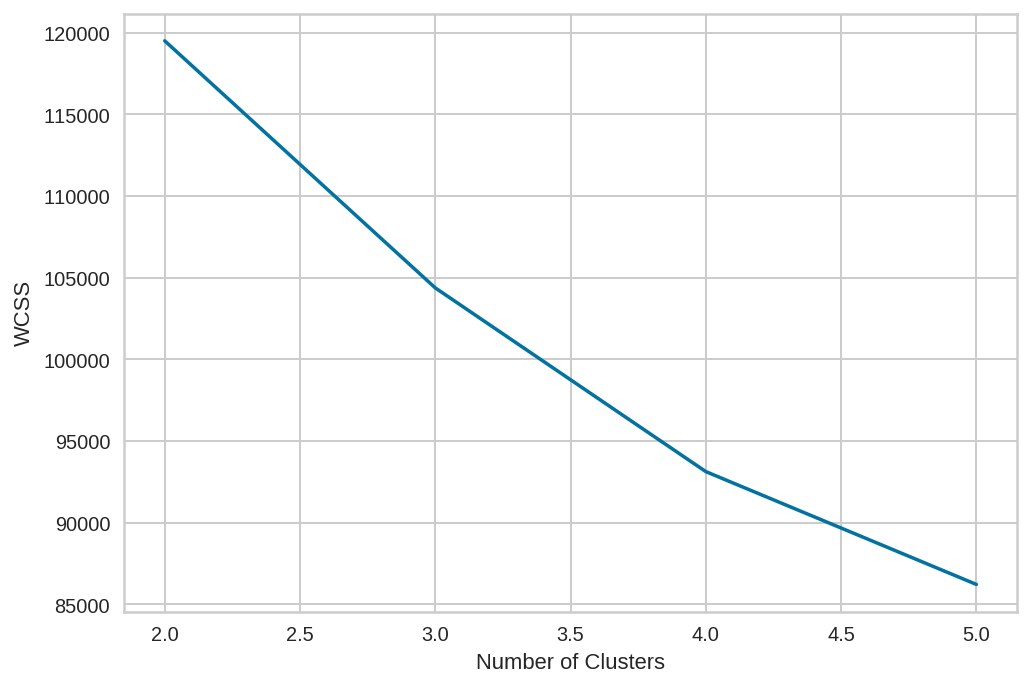

In [72]:
### 2-3. KMeans silhouette_score
wcss=[]
for i in range(2,6):
    knm = KMeans(n_clusters=i, random_state=1234)
    knm.fit(scaled_df)
    wcss_vl = knm.inertia_
    wcss.append(wcss_vl)
    print("Silhouette Coefficient for num_cluster",i, silhouette_score(scaled_df, knm.labels_))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(np.arange(2,6), wcss)
plt.show()

In [35]:
## K = 3

In [73]:
knm_4 = KMeans(n_clusters=4, random_state=1234)
knm_4.fit(scaled_df)
print(knm_4.cluster_centers_)
print(knm_4.inertia_)
print(knm_4.labels_)
labels = knm_4.labels_

[[-0.32377595  0.24922119  0.13608148  0.23504877 -0.36874655  0.98680852
   0.344773    0.8639205  -0.4648223  -0.36142932  0.29701349 -0.063437
  -0.1270314  -0.10679962  0.41348326  0.06316068]
 [ 1.43235473  0.38465769 -0.23778335 -0.26602675  1.67931138 -0.52205586
  -0.21784599 -0.46898559  1.74377389  1.60811717 -0.30047481  0.82084862
   0.59563212  0.43372429 -0.4025419  -0.09873541]
 [ 1.0702833   0.46783197  3.02243477  2.73294232 -0.11961042  1.16799135
   1.62062607  1.24890551 -0.27819897 -0.13727578  3.17749748  1.41209398
   1.91885821  0.74327384  0.33632589  0.33583521]
 [-0.26875992 -0.37387899 -0.33923819 -0.38578924 -0.1892743  -0.78900371
  -0.38393708 -0.70933665 -0.11221103 -0.17199215 -0.47128384 -0.33562451
  -0.26293895 -0.11515397 -0.2594723  -0.05620633]]
93123.43705466528
[3 1 0 ... 0 3 3]


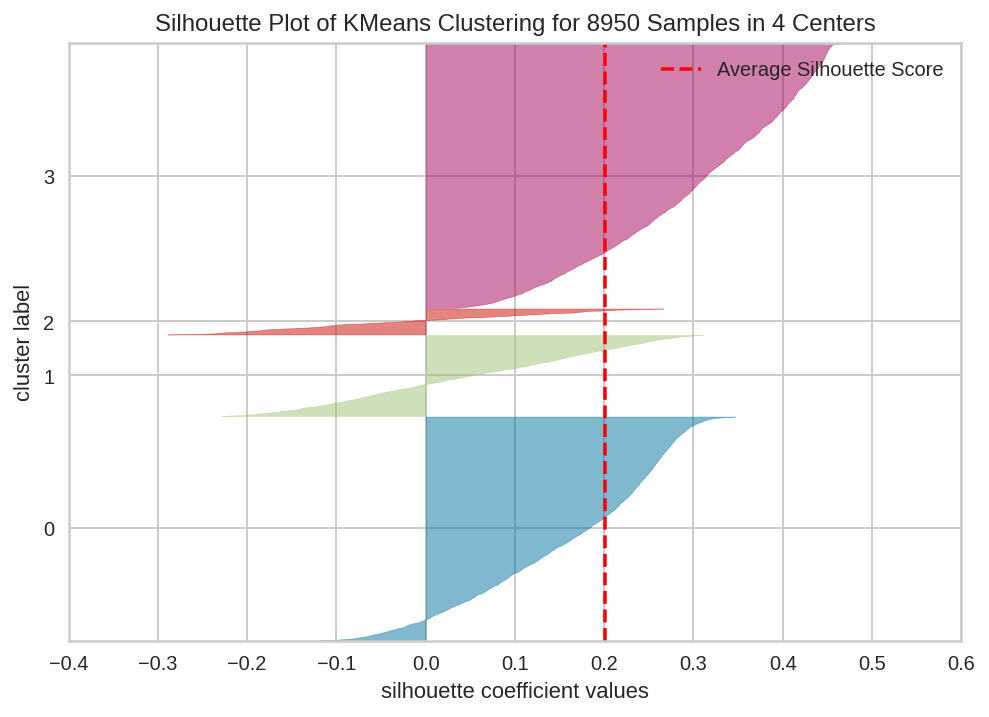

In [74]:
visualizer_2 = SilhouetteVisualizer(knm_4, colors='yellowbrick')
visualizer_2.fit(scaled_df)      
visualizer_2.show()

In [75]:
knm_3 = KMeans(n_clusters=3, random_state=1234)
knm_3.fit(scaled_df)
print(knm_3.cluster_centers_)
print(knm_3.inertia_)
print(knm_3.labels_)
labels = knm_3.labels_

[[-0.16017366  0.36755461  0.51295582  0.56828223 -0.35648973  1.07973209
   0.57975393  0.96627877 -0.45963376 -0.35419614  0.68980949  0.14581453
   0.11783679 -0.03260798  0.44687354  0.13343759]
 [ 1.46133619  0.38456582 -0.17274706 -0.20998974  1.68250078 -0.49532819
  -0.20010345 -0.43740044  1.72827145  1.61017622 -0.23909055  0.84033697
   0.6710352   0.53292673 -0.40017583 -0.09128085]
 [-0.2899214  -0.37675916 -0.32802507 -0.35821703 -0.207606   -0.6537498
  -0.36938602 -0.58669623 -0.14472376 -0.18912561 -0.43922803 -0.34120163
  -0.27348635 -0.12465421 -0.21616085 -0.07241123]]
104370.5184876943
[2 1 0 ... 2 2 2]


In [76]:
print(max(list(labels)),",", min(list(labels))) ##0, 1, 2

2 , 0


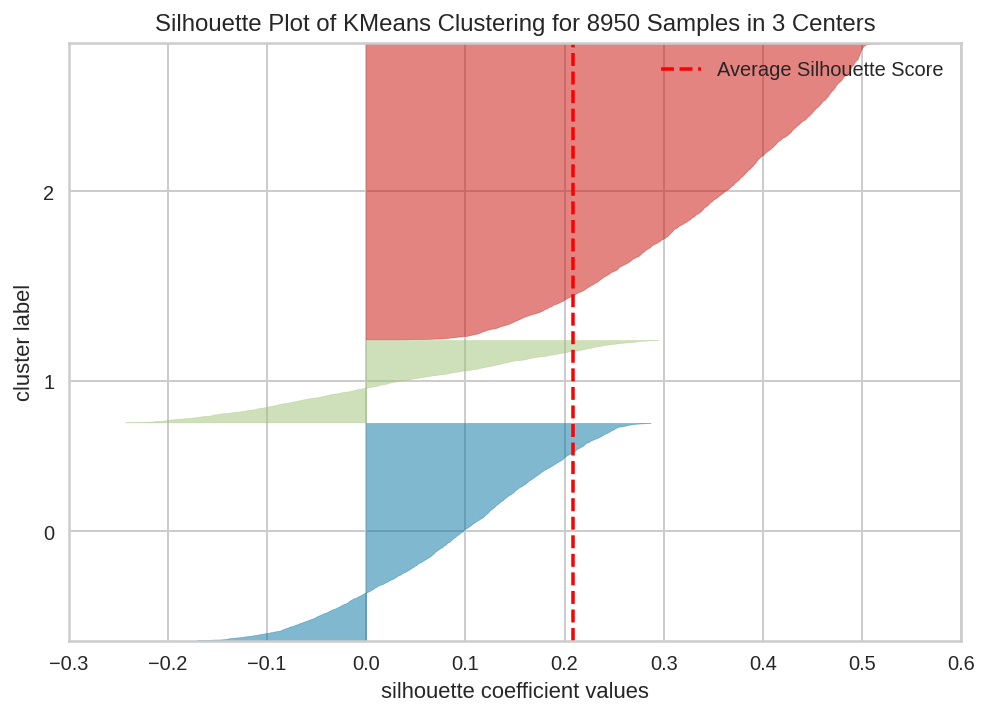

In [77]:
visualizer_2 = SilhouetteVisualizer(knm_3, colors='yellowbrick')
visualizer_2.fit(scaled_df)      
visualizer_2.show()

In [78]:
result_df = scaled_df.copy()

#클러스터ID 컬럼 생성 
result_df.loc[:,'clusterID'] = visualizer_2.predict(scaled_df)
#실루엣 계수 컬럼 생성
result_df.loc[:,'silhouette coefficient'] = visualizer_2.silhouette_samples_

result_df.shape
result_df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusterID,silhouette coefficient
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,2,0.471371
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,1,-0.066640
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0,-0.001511
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,2,0.424868
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,2,0.473107


In [79]:
print('전체 데이터의 실루엣 계수 평균')
result_df['silhouette coefficient'].mean()

전체 데이터의 실루엣 계수 평균


0.20888560362390385

In [80]:
print('\n군집별 실루엣 계수 평균')
result_df.groupby('clusterID')['silhouette coefficient'].mean().reset_index()


군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.089147
1,1,0.036747
2,2,0.344478


In [ ]:
########################################

In [69]:
## 3. Decision Regressor

In [70]:
### 3-1. train-test split

In [75]:
card1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [82]:
card1_df3 = ds_df_1.copy()
card1_df3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
not4_count = card1_df3.iloc[ : , : ][card1_df3.index % 4 !=  0].count() ## 4의 배수가 아닌 것이 몇개인지 세어보자.
not4_count

CUST_ID                             6712
BALANCE                             6712
BALANCE_FREQUENCY                   6712
PURCHASES                           6712
ONEOFF_PURCHASES                    6712
INSTALLMENTS_PURCHASES              6712
CASH_ADVANCE                        6712
PURCHASES_FREQUENCY                 6712
ONEOFF_PURCHASES_FREQUENCY          6712
PURCHASES_INSTALLMENTS_FREQUENCY    6712
CASH_ADVANCE_FREQUENCY              6712
CASH_ADVANCE_TRX                    6712
PURCHASES_TRX                       6712
CREDIT_LIMIT                        6712
PAYMENTS                            6712
MINIMUM_PAYMENTS                    6712
PRC_FULL_PAYMENT                    6712
TENURE                              6712
dtype: int64

In [97]:
yes4_count = card1_df3.iloc[ : , : ][card1_df3.index % 4 ==  0].count() ## 4의 배수인 것이 몇개인지 세어보자.
yes4_count

CUST_ID                             2238
BALANCE                             2238
BALANCE_FREQUENCY                   2238
PURCHASES                           2238
ONEOFF_PURCHASES                    2238
INSTALLMENTS_PURCHASES              2238
CASH_ADVANCE                        2238
PURCHASES_FREQUENCY                 2238
ONEOFF_PURCHASES_FREQUENCY          2238
PURCHASES_INSTALLMENTS_FREQUENCY    2238
CASH_ADVANCE_FREQUENCY              2238
CASH_ADVANCE_TRX                    2238
PURCHASES_TRX                       2238
CREDIT_LIMIT                        2238
PAYMENTS                            2238
MINIMUM_PAYMENTS                    2238
PRC_FULL_PAYMENT                    2238
TENURE                              2238
dtype: int64

In [102]:
total_count = not4_count + yes4_count
total_count

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [101]:
max(card1_df3.index) + 1

8950

In [99]:
max(card1_df3.index) + 1 == not4_count + yes4_count ## 위 2개의 합이 총합과 일치하는지 확인

CUST_ID                             True
BALANCE                             True
BALANCE_FREQUENCY                   True
PURCHASES                           True
ONEOFF_PURCHASES                    True
INSTALLMENTS_PURCHASES              True
CASH_ADVANCE                        True
PURCHASES_FREQUENCY                 True
ONEOFF_PURCHASES_FREQUENCY          True
PURCHASES_INSTALLMENTS_FREQUENCY    True
CASH_ADVANCE_FREQUENCY              True
CASH_ADVANCE_TRX                    True
PURCHASES_TRX                       True
CREDIT_LIMIT                        True
PAYMENTS                            True
MINIMUM_PAYMENTS                    True
PRC_FULL_PAYMENT                    True
TENURE                              True
dtype: bool

In [103]:
### 갯수를 확인했으니 분리해보자.

In [130]:
train_with_target = card1_df3.iloc[ : , : ][card1_df3.index % 4 !=  0]
train_with_target.shape

(6712, 18)

In [131]:
test_with_target = card1_df3.iloc[ : , : ][card1_df3.index % 4 ==  0]
test_with_target.shape

(2238, 18)

In [132]:
### 전체 갯수 확인
train_with_target.shape[0] + test_with_target.shape[0]

8950

In [133]:
train_with_target.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [134]:
y_train = train_with_target['ONEOFF_PURCHASES'] # train data target값 분류
y_train.shape

(6712,)

In [135]:
y_test = test_with_target['ONEOFF_PURCHASES'] # test data target값 분류
y_test.shape

(2238,)

In [136]:
train_with_target.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12


In [137]:
x_train = train_with_target.drop(["CUST_ID", "ONEOFF_PURCHASES"], axis=1)
x_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [139]:
x_test = test_with_target.drop(["CUST_ID", "ONEOFF_PURCHASES"], axis=1)
x_test.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.4,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,0.0,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12
8,1014.926473,1.000000,861.49,200.0,0.0,0.333333,0.083333,0.250000,0.0,0,5,7000.0,688.278568,311.963409,0.0,12


In [141]:
x_test.shape, x_test.columns

((2238, 16),
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
       dtype='object'))

In [142]:
x_train.shape, x_train.columns

((6712, 16),
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
       dtype='object'))

In [146]:
## model 객체 생성 
df_reg = DecisionTreeRegressor(random_state=1234)

In [147]:
df_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1234)

In [150]:
pred_test = df_reg.predict(x_test)
pred_test[:5]

array([   0.  ,   15.  ,  600.01, 2415.75,    0.  ])

In [153]:
df_reg.feature_importances_ #'PURCHASES'가 제일 높은 가중치를 가짐, 'INSTALLMENTS_PURCHASES'가 2번째 가중치가 높음.

array([1.30108673e-03, 2.55531226e-05, 9.05932427e-01, 7.47623931e-02,
       3.87658129e-05, 6.82705038e-05, 1.49222480e-02, 1.24915579e-04,
       7.73290653e-06, 2.56756957e-05, 1.27421992e-04, 2.52443628e-04,
       4.38415645e-04, 1.84624321e-03, 1.13952227e-04, 1.24548149e-05])

In [154]:
r2_score(y_test, pred_test)

0.923116933406383

In [157]:
np.sqrt(mean_squared_error(y_test, pred_test))

448.79366563840694